In [1]:
! pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=ffeafb3c98620f690b29052682949707a6e774ca9fdb7d78571c41813d90cdee
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [2]:
%cd /content/drive/MyDrive/Github/FL-project

/content/drive/MyDrive/Github/FL-project


In [3]:
from main import *
import argparse
from centralized import Centralized
from client import *

In [4]:
class Args():
  def __init__(self, dataset, model, bs, hnm, num_epochs):
    self.dataset = dataset
    self.model = model 
    self.bs = bs
    self.hnm = hnm
    self.num_epochs = num_epochs

args = Args('iddaCB', model = 'deeplabv3_mobilenetv2', bs = 16, hnm = True, num_epochs = 15)

In [5]:
# We get the dataset and we create an instance of the model.
trainAloneDataset, testAloneDatasets = get_datasets(args)

ds    = trainAloneDataset[0]
model = model_init(args)

Downloading: "https://github.com/d-li14/mobilenetv2.pytorch/raw/master/pretrained/mobilenetv2_1.0-0c6065bc.pth" to /root/.cache/torch/hub/checkpoints/mobilenetv2_1.0-0c6065bc.pth
100%|██████████| 13.5M/13.5M [00:00<00:00, 125MB/s]


In [ ]:
# In order to simulate the behaviour of our model, we simulate a centralized
# environment.
centralized = Centralized(args,ds,model)
#state_dict  = torch.load('modelliSalvati/checkpoint_temp.pth')
#model.classifier.load_state_dict(state_dict)

# We pass to our centralized environment the optimization algorithm and the 
# rate decay technique. Finally, we train our model. Thanks to WandB, we can
# keep track of the different performance.
opt_params = {'optimizer': {
                            'name'    : 'Adam',
                            'settings': {'lr'   : 0.01}
                            },
              'scheduler': {
                            'name'    : 'ConstantLR',
                            'settings': {'factor': 0.33}
                            }
              }


centralized.set_opt(opt_params)
# Set how many steps we want to wait before plotting the loss.
centralized.train(n_steps = 15)
# Set how many steps we want to wait before plotting the vertical lines.
centralized.print_learning(step = 10)

In [ ]:
img.transpose(1, 2, 0).shape

(512, 928, 3)

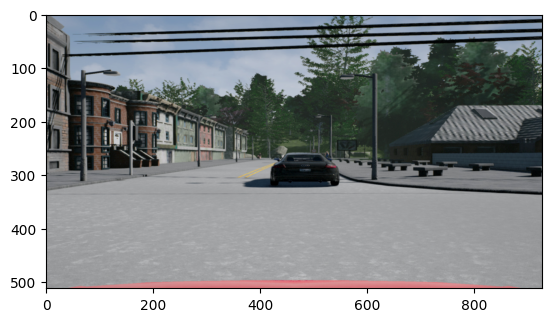

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img.transpose(1, 2, 0))

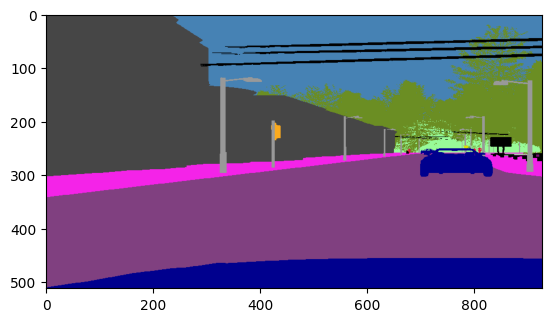

In [ ]:
plt.imshow(target)